In [1]:
import networkx as nx
import pulp as lp

# Data

From https://www.janestreet.com/bug-byte/?utm_source=sponsorship&utm_medium=youtube&utm_campaign=computerphileapril
Nodes are defined from left to right, top to bottom

In [30]:
G=nx.Graph()

# nodes
G.add_node(1,M=17)
G.add_node(2,M=3)
G.add_node(3,N=31)
G.add_node(4,N=[19,23])
G.add_node(5)
G.add_node(6,N=8)
G.add_node(7,N=[6,9,16])
G.add_node(8,M=54)
G.add_node(9,M=49)
G.add_node(10,M=60)
G.add_node(11,M=79)
G.add_node(12,M=75)
G.add_node(13)
G.add_node(14,M=29)
G.add_node(15)
G.add_node(16,M=39)
G.add_node(17,M=25)
G.add_node(18)

# edges
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,5)
G.add_edge(3,8)
G.add_edge(4,5)
G.add_edge(4,8)
G.add_edge(5,9)
G.add_edge(6,9)
G.add_edge(7,10)
G.add_edge(8,10)
G.add_edge(8,11)
G.add_edge(9,10)
G.add_edge(9,12)
G.add_edge(10,11)
G.add_edge(10,12)
G.add_edge(11,13)
G.add_edge(11,14)
G.add_edge(11,16)
G.add_edge(12,15)
G.add_edge(12,17)
G.add_edge(14,16)
G.add_edge(14,17)
G.add_edge(16,18)
G.add_edge(17,18)


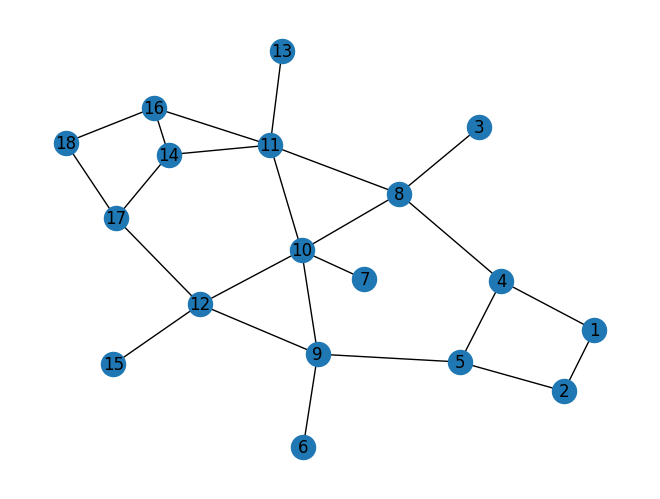

In [31]:
nx.draw(G,with_labels=True,pos=nx.spring_layout(G))

# Optimize

In [43]:
# create problem
prob = lp.LpProblem("bug", lp.LpMaximize)

# variables
x = lp.LpVariable.dicts("x",(G.edges(),[n for n in range(1,25)]), cat=lp.LpBinary)

# dummy objective
prob += 0

# every number from 1 to 24 must be used exactly once
for n in range(1,25):
    prob += lp.lpSum(x[(u,v)][n] for (u,v) in x) == 1, "use_%s,"%n

# every edge is assigned 1 number exactly
for (u,v) in x:
    prob += lp.lpSum(x[(u,v)][n] for n in range(1,25)) == 1, "edge_%s_%s"%(u,v)

# the sum of all edges directly connected to this node equals M
for v in G.nodes():
    if "M" in G.nodes[v]:
        prob += lp.lpSum(n*x[(u,v)][n] for u in G.neighbors(v) if (u,v) in x for n in range(1,25)) \
        + lp.lpSum(n*x[(v,u)][n] for u in G.neighbors(v) if (v,u) in x for n in range(1,25)) == G.nodes[v]["M"], "sum_node_%s"%v

# given edges
prob += x[(4,5)][12] == 1
prob += x[(10,11)][24] == 1
prob += x[(11,16)][7] == 1
prob += x[(9,12)][20] == 1

In [44]:
#prob

In [45]:
prob.solve()

1

In [61]:
for (u,v) in x:
    for n in x[(u,v)]:
        val = lp.value(x[(u,v)][n])
        if val > 0.8:
            print(u,v,"->",n)
            G.edges[(u,v)]["weight"] = n

1 2 -> 2
1 4 -> 15
2 5 -> 1
3 8 -> 21
4 5 -> 12
4 8 -> 9
5 9 -> 18
6 9 -> 8
7 10 -> 6
8 10 -> 10
8 11 -> 14
9 10 -> 3
9 12 -> 20
10 11 -> 24
10 12 -> 17
11 13 -> 23
11 14 -> 11
11 16 -> 7
12 15 -> 22
12 17 -> 16
14 16 -> 13
14 17 -> 5
16 18 -> 19
17 18 -> 4


In [62]:
nx.shortest_path(G,source=5,target=18,weight="weight")

[5, 4, 8, 11, 14, 17, 18]

In [63]:
nx.shortest_path_length(G,source=5,target=18,weight="weight")

55